In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
amazon_df = pd.read_csv('archivo_combinado.csv')

In [3]:
amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

### 1. CROSSTAB ANALYSIS

In [6]:
amazon_df.category.value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
crosstab_result = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'], margins=False)
print(crosstab_result)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [8]:
# Calculate the total number of products in each category
crosstab_result['Total'] = crosstab_result[False] + crosstab_result[True]

In [9]:
# Calculate the proportion of best-sellers in each category
crosstab_result['BestSellerProportion'] = crosstab_result[True] / crosstab_result['Total']

In [10]:
# Optional: Rename columns for better readability
crosstab_result.columns = ['Not Best Seller', 'Best Seller', 'Total Products', 'Best Seller Proportion']

In [11]:
crosstab_result['Best Seller Proportion'].sort_values(ascending= False)

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: Best Seller Proportion, Length: 296, dtype: float64

### 2. STATISTICAL TESTS 

In [13]:
crosstab_result = pd.crosstab(index= amazon_df['category'], columns = amazon_df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [14]:
from scipy.stats import chi2_contingency

In [15]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

In [16]:
chi2_pvalue

0.0

In [17]:
from scipy.stats.contingency import association

In [18]:
association(crosstab_result, method='cramer')

0.1222829439760564

In [19]:
# No hay relación entre ellos 

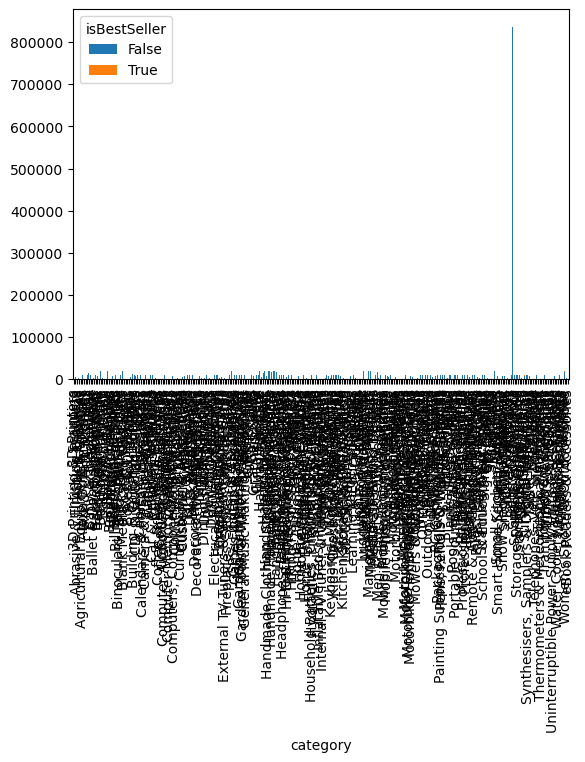

In [20]:
crosstab_result.plot(kind='bar', stacked=True)
plt.show()

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [23]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [24]:
data_series = amazon_df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series).index
print(outliers)

Index([     10,      19,      25,      28,      31,      33,      34,      35,
            36,      37,
       ...
       2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
       2443641, 2443643],
      dtype='int64', length=327688)


In [25]:
df2=amazon_df.copy()

In [26]:
df2=df2.drop(index=outliers)

In [27]:
cat_20 = amazon_df.category.value_counts().head(20).index.tolist()
cat_20

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts',
 'Manicure & Pedicure Products',
 'Skin Care',
 'Make-up',
 'Hair Care',
 'Fragrances',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Handmade Jewellery',
 'Handmade Artwork',
 'Women',
 'Handmade Home & Kitchen Products',
 'Handmade Kitchen & Dining',
 'Men',
 'Baby']

In [28]:
filtered_prices = amazon_df[amazon_df['category'].isin(cat_20)][['category', 'price']]

In [29]:
filtered_df = df2[df2['category'].isin(cat_20)]

C:\Users\julyj\AppData\Local\Temp\ipykernel_29964\1158947416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price', palette='coolwarm', inner='quartile')


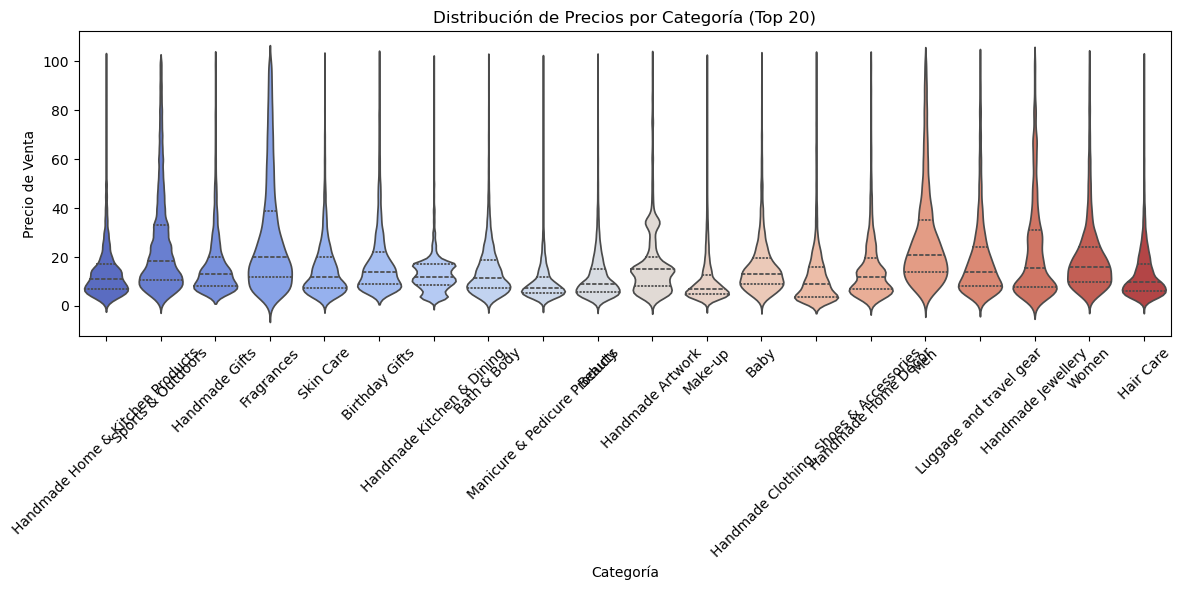

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='category', y='price', palette='coolwarm', inner='quartile')
plt.title('Distribución de Precios por Categoría (Top 20)')
plt.xlabel('Categoría')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.tight_layout()  # Ajustar diseño
plt.show()  

In [31]:
#Sports and outdoors 

In [32]:
cat_10 =amazon_df.category.value_counts().head(10)

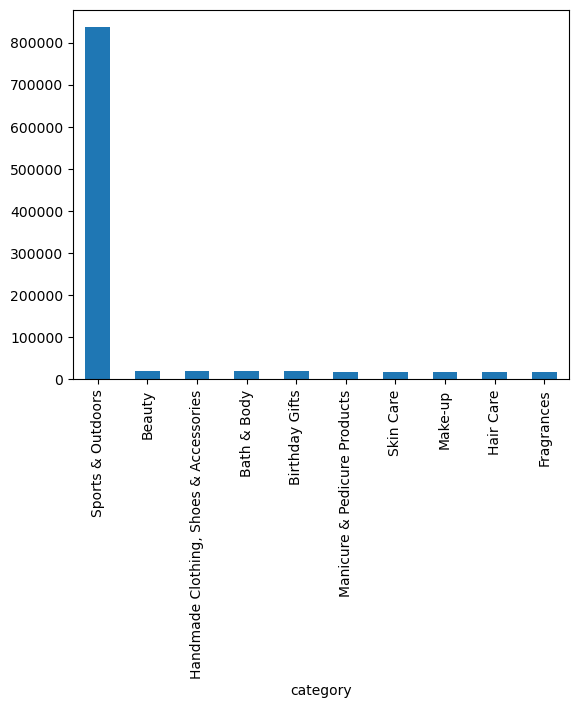

In [33]:
cat_10.plot(kind='bar')
plt.show()

In [34]:
# Sports and outdoors commands the highest average price 

In [35]:
category_counts = df2['category'].value_counts()

In [36]:
top_10_categories = category_counts.nlargest(10).index.tolist()

In [37]:
filtered_df2 = df2[df2['category'].isin(top_10_categories)]

In [ ]:
sns.boxplot(data=filtered_df2, x="price", y="stars", palette="coolwarm")
plt.show()

C:\Users\julyj\AppData\Local\Temp\ipykernel_29964\2702455024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df2, x="price", y="stars", palette="coolwarm")


### Part 3

 Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


In [ ]:
correlation = df['price'].corr(df['stars'])

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='stars')
plt.title('Scatter Plot: Price vs Stars')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.show()

In [ ]:
numerical_columns = ['price', 'stars', 'reviews', 'boughtInLastMonth']
corr_matrix = amazon_df[numerical_columns].corr()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import scipy.stats as stats

# QQ plot for price
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Price Distribution')
plt.show()